In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('../train.csv')

# DATA EXPLORATION

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.shape

(891, 12)

In [9]:
df.size

10692

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.575,NaN,S


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# CORRECTING

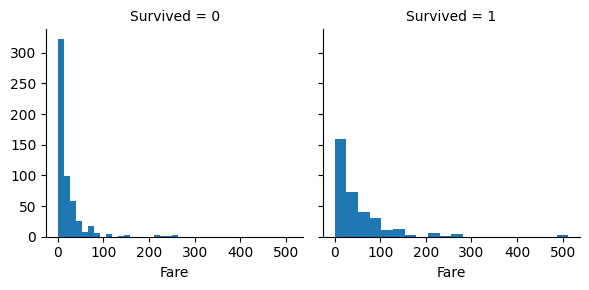

In [14]:
graph = sns.FacetGrid(df, col="Survived")
graph.map(plt.hist, "Fare", bins=20)

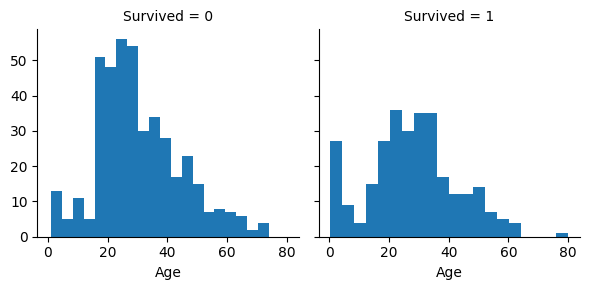

In [16]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()
graph_age = sns.FacetGrid(df, col="Survived")
graph_age.map(plt.hist, "Age", bins=20)

In [17]:
df.loc[df["Age"]>70, "Age"] = 70

# COMPLETING

In [18]:
for column in df:
  print(column, ": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [19]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [20]:
print(df["Embarked"].value_counts())
df["Embarked"].fillna("S", inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [21]:
del df["Cabin"]

In [22]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [23]:
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Major']:
        return 'Officer'
    elif title in ["Jonkheer","Don",'the Countess', 'Dona', 'Lady',"Sir"]:
        return 'Royalty'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title

In [24]:
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
# df.drop("Cabin", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)
df.Sex.replace(('male','female'), (0,1), inplace = True)
df.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
df.Title.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace = True)

In [25]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
793,794,0,1,0,28.0,0,0,30.6958,1,0
657,658,0,3,1,32.0,1,1,15.5000,2,2
355,356,0,3,0,28.0,0,0,9.5000,0,0
68,69,1,3,1,17.0,4,2,7.9250,0,1
591,592,1,1,1,52.0,1,0,78.2667,1,2


In [35]:
predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

filename = 'titanic_model.sav'
pickle.dump(randomforest, open(filename, 'wb'))

In [36]:
def prediction_model(pclass, sex, age, sibsp, parch, fare, embarked, title):
    x = [[pclass, sex, age, sibsp, parch, fare, embarked, title]]
    randomforest = pickle.load(open('titanic_model.sav', 'rb'))
    predictions = randomforest.predict(x)
    print(predictions)

In [37]:
df.sample(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
221,222,0,2,0,27.0,0,0,13.0000,0,0
381,382,1,3,1,1.0,0,2,15.7417,1,1


In [38]:
prediction_model(3, 0, 33, 0, 0, 9, 1, 0)

[0]


/home/ubuntu/pyenv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
